In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
fdf = pd.read_csv('bank-full.csv')

In [3]:
# a) Vizualizarea datelor
print("Primele 5 rânduri din dataset:")
print(fdf.head())

# b) Vizualizarea statisticilor descriptive
print("\nStatistici descriptive:")
print(fdf.describe())

# c) Tratarea valorilor lipsă
print("\nNumărul de valori lipsă pe coloană:")
print(fdf.isnull().sum())

Primele 5 rânduri din dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Statistici descriptive:
                age        balance           day      d

In [4]:
# Encode categorical variables
label_encoders = {}
for column in fdf.select_dtypes(include=['object']).columns:
    if column != 'y':  
        le = LabelEncoder()
        fdf[column] = le.fit_transform(fdf[column])
        label_encoders[column] = le

# Encode target variable
fdf['y'] = fdf['y'].map({'yes': 1, 'no': 0})

In [5]:
# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(fdf.drop(columns=['y']))
fdf['anomaly'] = outliers

# Removing anomalies
fdf = fdf[fdf['anomaly'] == 1].drop(columns=['anomaly'])

In [6]:
# Split data into features and target
X = fdf.drop(columns=['y'])
y = fdf['y']

# Standardizing the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# a) Modelul de regresie logistică
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print("\nRegresie Logistica - Acurracy:", log_accuracy)
print(classification_report(y_test, y_pred_log))


Regresie Logistica - Acurracy: 0.8955762514551805
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7627
           1       0.60      0.21      0.31       963

    accuracy                           0.90      8590
   macro avg       0.75      0.60      0.63      8590
weighted avg       0.87      0.90      0.87      8590



In [12]:
# b) Modelul arborelui decizional
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("\nArbore Decizional - Acurracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))


Arbore Decizional - Acurracy: 0.8782305005820722
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7627
           1       0.46      0.47      0.46       963

    accuracy                           0.88      8590
   macro avg       0.70      0.70      0.70      8590
weighted avg       0.88      0.88      0.88      8590



In [14]:
# c) Modelul Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest - Acurracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))


Random Forest - Acurracy: 0.9073341094295693
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7627
           1       0.64      0.40      0.49       963

    accuracy                           0.91      8590
   macro avg       0.78      0.69      0.72      8590
weighted avg       0.90      0.91      0.90      8590




Compararea performanțelor modelelor:
                Model  Acuratețe
0  Regresie Logistică   0.895576
1   Arbore Decizional   0.878231
2       Random Forest   0.907334


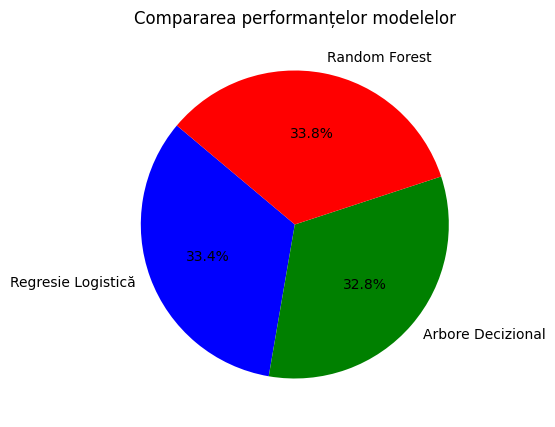

In [15]:
# Compararea performanțelor modelelor
df_comparison = pd.DataFrame({
    'Model': ['Regresie Logistică', 'Arbore Decizional', 'Random Forest'],
    'Acuratețe': [log_accuracy, dt_accuracy, rf_accuracy]
})

print("\nCompararea performanțelor modelelor:")
print(df_comparison)

# Vizualizare grafică alternativă utilizând un pie chart
plt.figure(figsize=(8, 5))
plt.pie(df_comparison['Acuratețe'], labels=df_comparison['Model'], autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red'])
plt.title('Compararea performanțelor modelelor')
plt.show()

In [ ]:
# Streamlit UI
st.title("Compararea performanțelor modelelor")
st.write("Acuratețea fiecărui model:")
df_comparison = pd.DataFrame(list(results.items()), columns=['Model', 'Acuratețe'])
st.dataframe(df_comparison)

# Plot results
st.bar_chart(df_comparison.set_index('Model'))